In [2]:
# Подключение нужных библиотек
import matplotlib.pyplot as plt # Импортируем модуль для отрисовки графиков
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import preprocessing 
import tensorflow as tf
import glob
import tensorflow.keras
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras import optimizers
from tensorflow.keras.optimizers import Adam  
from sklearn.preprocessing import StandardScaler 
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Импортируем матрицу ошибок классификатора
from tensorflow.keras import utils # Импортируем модуль utils библиотеки tensorflow.keras для получения OHE-представления
from sklearn.model_selection import train_test_split # Импортируем модуль для разделения на обучающую и проверочную/тестовую выборку
import numpy as np # Импортируем библиотеку работы с массивами
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import os # Импортируем модуль для работы с файлами
import random # Импортируем модуль для генерации случайных чисел

In [3]:
from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/t1_20220101_20220726_rg_201589066.csv', index_col=0)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_backup = df.copy()

In [6]:
# Целевой столбец
df['ym:s:goalsID'].unique()

array(['[]', '[45605569]', '[45605569,152446093,45085622]', ...,
       '[116942056,249595028]',
       '[45605569,249595028,249595129,249595330,36278473,201589066]',
       '[66245989,249595028,249169368]'], dtype=object)

In [7]:
df.head()

,Unnamed: 0.1,ym:s:bounce,ym:s:browser,ym:s:browserCountry,ym:s:browserLanguage,ym:s:clientID,ym:s:cookieEnabled,ym:s:date,ym:s:deviceCategory,ym:s:endURL,...,ym:s:screenWidth,ym:s:startURL,ym:s:UTMCampaign,ym:s:UTMContent,ym:s:UTMMedium,ym:s:UTMSource,ym:s:UTMTerm,ym:s:visitDuration,ym:s:visitID,ym:s:watchIDs
0,0,1,chrome,us,en,1654489350380812167,1,2022-06-06,1,endURL_1,...,1920,startURL_1,NaN,NaN,NaN,NaN,NaN,0,3107078458710949968,[3107078458710949968]
1,1,1,yandexsearch,ru,ru,1654774521346384154,1,2022-06-09,2,endURL_2,...,360,startURL_2,june22,spec_all,banner,novostroy-m,NaN,0,3181830630067929292,[3181830630067929292]
2,2,1,safari_mobile,NaN,ru,1656147792622821132,1,2022-06-25,2,endURL_1,...,375,startURL_1,june22,spec_all,banner,pronovostroy,NaN,0,3541825601891205395,[3541825601891205395]
3,3,0,chromemobile,ru,ru,164793238281186116,1,2022-03-22,2,endURL_3,...,360,startURL_1,konkurenty-vc_net_mmo|61228084,id|31333861543_|cid|61228084|gid|4546929028|ai...,cpc,yandex,31333861543_,63,1387990388022968378,"[1387990388022968378,1388007054027522266,13879..."
4,4,1,safari_mobile,NaN,ru,1654789614786669323,1,2022-06-09,2,endURL_1,...,390,startURL_1,prigranichye_net_mir|74741535,id|39038979686_|cid|74741535|gid|4924248374|ai...,cpc,yandex,39038979686_,0,3185787202690875607,[3185787202690875607]


In [8]:
print(df.shape)

(361919, 67)


In [9]:
# Пример одной строчки
n = 1235
for i in range(len(df.values[n])): 
  print(i, " ", df.values[n][i])

0   1235
1   0
2   atom
3   ru
4   ru
5   1655540048909222607
6   1
7   2022-06-22
8   1
9   endURL_1
10   nan
11   nan
12   []
13   []
14   []
15   []
16   0
17   []
18   5.189.223.xxx
19   0
20   1
21   ya_direct
22   Не отказ // 1 день
23   4939144808
24   12274080406
25   lastDirectClickBannerName_2
26   75208372.0
27   retargeting_net_rf
28   nan
29   lastDirectPhraseOrCond_0
30   nan
31   nan
32   nan
33   nan
34   nan
35   nan
36   nan
37   nan
38   nan
39   ad
40   nan
41   nan
42   []
43   []
44   []
45   []
46   []
47   []
48   nan
49   nan
50   nan
51   nan
52   1
53   nan
54   Voronezh
55   768
56   2
57   1366
58   startURL_1
59   retargeting_net_rf|75208372
60   id|32962478_32962478|cid|75208372|gid|4939144808|aid|12274080406|adp|no|pos|none0|src|context_derevoobrabotka.fun|dvc|desktop|coef|7453626
61   cpc
62   yandex
63   32962478_32962478
64   20
65   3473865062908428534
66   [3473865062908428534,3473870194011013333]


In [10]:
# Убираем первый столбец с продублированными индексами
df = df.drop(df.columns[0],axis = 1) 

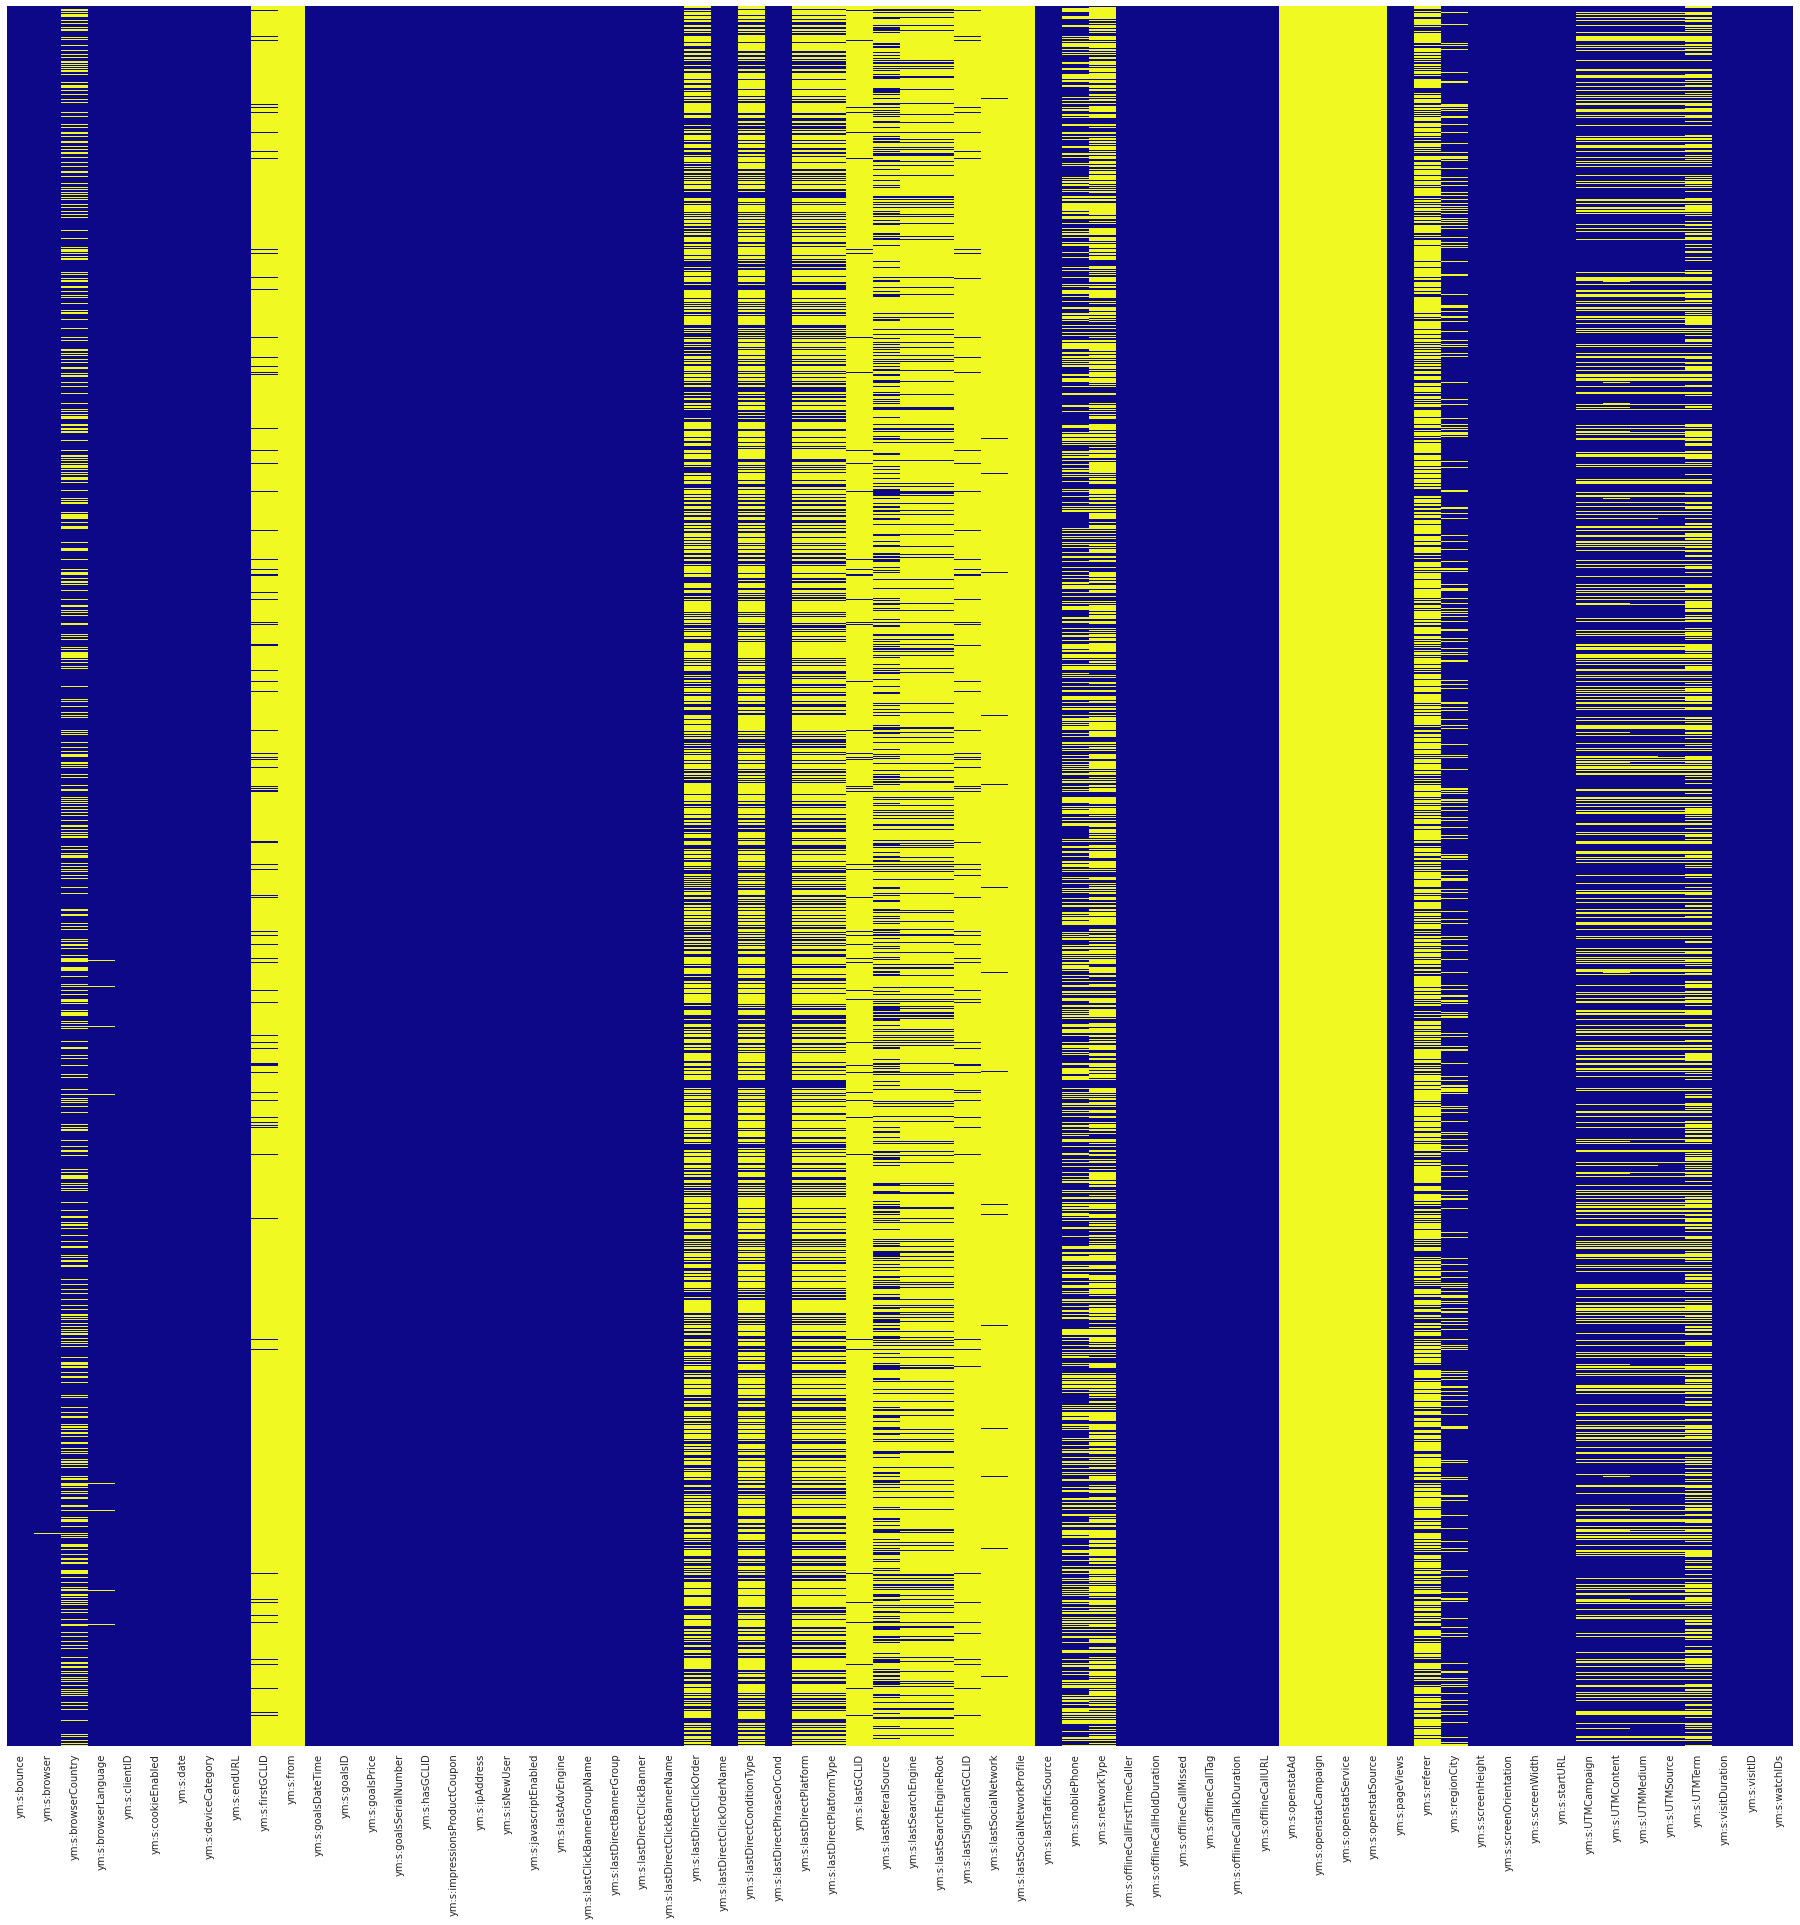

In [11]:
# Можем посмотреть на тепловую карту таблицы , где желтым цветом будут отображаться NAN, а синим - полезные данные
fig, ax = plt.subplots(figsize=(32,32))                                             # Создаем область под график
sns_heatmap = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='plasma') # Визуализируем пропуски
plt.show()  

In [12]:
print(df['ym:s:from'].isna().sum())
print(df['ym:s:lastSocialNetworkProfile'].isna().sum())
print(df['ym:s:openstatAd'].isna().sum())
print(df['ym:s:openstatCampaign'].isna().sum())
print(df['ym:s:openstatService'].isna().sum())
print(df['ym:s:openstatSource'].isna().sum())

361900
361905
361914
361914
361914
361914


In [13]:
# Этот код удалит все столбцы, где все записи это  NaN
# df.dropna( axis = 1, how = 'all', inplace=True) - пока закомментируем, так как в этой таблице нет поностью пустых столбцов (361919 строк)

In [14]:
# Можем посмотреть на тепловую карту таблицы, где желтым цветом будут отображаться NAN, а синим - полезные данные
# fig, ax = plt.subplots(figsize=(32,200))                                             # Создаем область под график
# sns_heatmap = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='plasma') # Визуализируем пропуски
# plt.show() 

In [15]:
# Удалим практически пустые
del df['ym:s:from']
del df['ym:s:lastSocialNetworkProfile']
del df['ym:s:openstatAd']
del df['ym:s:openstatCampaign']
del df['ym:s:openstatService']
del df['ym:s:openstatSource']
del df['ym:s:impressionsProductCoupon']

In [16]:
df.shape

(361919, 59)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361919 entries, 0 to 361918
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ym:s:bounce                      361919 non-null  int64  
 1   ym:s:browser                     361831 non-null  object 
 2   ym:s:browserCountry              267457 non-null  object 
 3   ym:s:browserLanguage             360842 non-null  object 
 4   ym:s:clientID                    361919 non-null  uint64 
 5   ym:s:cookieEnabled               361919 non-null  int64  
 6   ym:s:date                        361919 non-null  object 
 7   ym:s:deviceCategory              361919 non-null  int64  
 8   ym:s:endURL                      361919 non-null  object 
 9   ym:s:firstGCLID                  17407 non-null   object 
 10  ym:s:goalsDateTime               361919 non-null  object 
 11  ym:s:goalsID                     361919 non-null  object 
 12  ym

# Label Encoder

In [18]:
# Переведем все строковые значения в числовые

label_encoder = preprocessing.LabelEncoder()            

columns = ['ym:s:browser', 'ym:s:browserCountry', 'ym:s:browserLanguage', 'ym:s:date', 'ym:s:endURL', 'ym:s:firstGCLID',
           'ym:s:goalsDateTime', 'ym:s:goalsPrice', 'ym:s:goalsSerialNumber', 'ym:s:ipAddress', 'ym:s:lastAdvEngine', 'ym:s:lastClickBannerGroupName',
           'ym:s:lastDirectClickBannerName', 'ym:s:lastDirectClickOrderName', 'ym:s:lastDirectConditionType',
           'ym:s:lastDirectPhraseOrCond', 'ym:s:lastDirectPlatform', 'ym:s:lastDirectPlatformType', 'ym:s:lastGCLID',
           'ym:s:lastReferalSource', 'ym:s:lastSearchEngine', 'ym:s:lastSearchEngineRoot', 'ym:s:lastSignificantGCLID',
           'ym:s:lastSocialNetwork', 'ym:s:lastTrafficSource', 'ym:s:mobilePhone', 'ym:s:networkType',
           'ym:s:offlineCallFirstTimeCaller', 'ym:s:offlineCallHoldDuration', 'ym:s:offlineCallMissed', 'ym:s:offlineCallTag',
           'ym:s:offlineCallTalkDuration', 'ym:s:offlineCallURL', 'ym:s:referer', 'ym:s:regionCity', 'ym:s:startURL',
           'ym:s:UTMCampaign', 'ym:s:UTMContent', 'ym:s:UTMMedium', 'ym:s:UTMSource', 'ym:s:UTMTerm', 'ym:s:watchIDs',
           'ym:s:goalsID']

# Переводим строковые значения в числовые
df[columns] = df[columns].apply(label_encoder.fit_transform)     

# Feature selection

*201589066* - наша цель

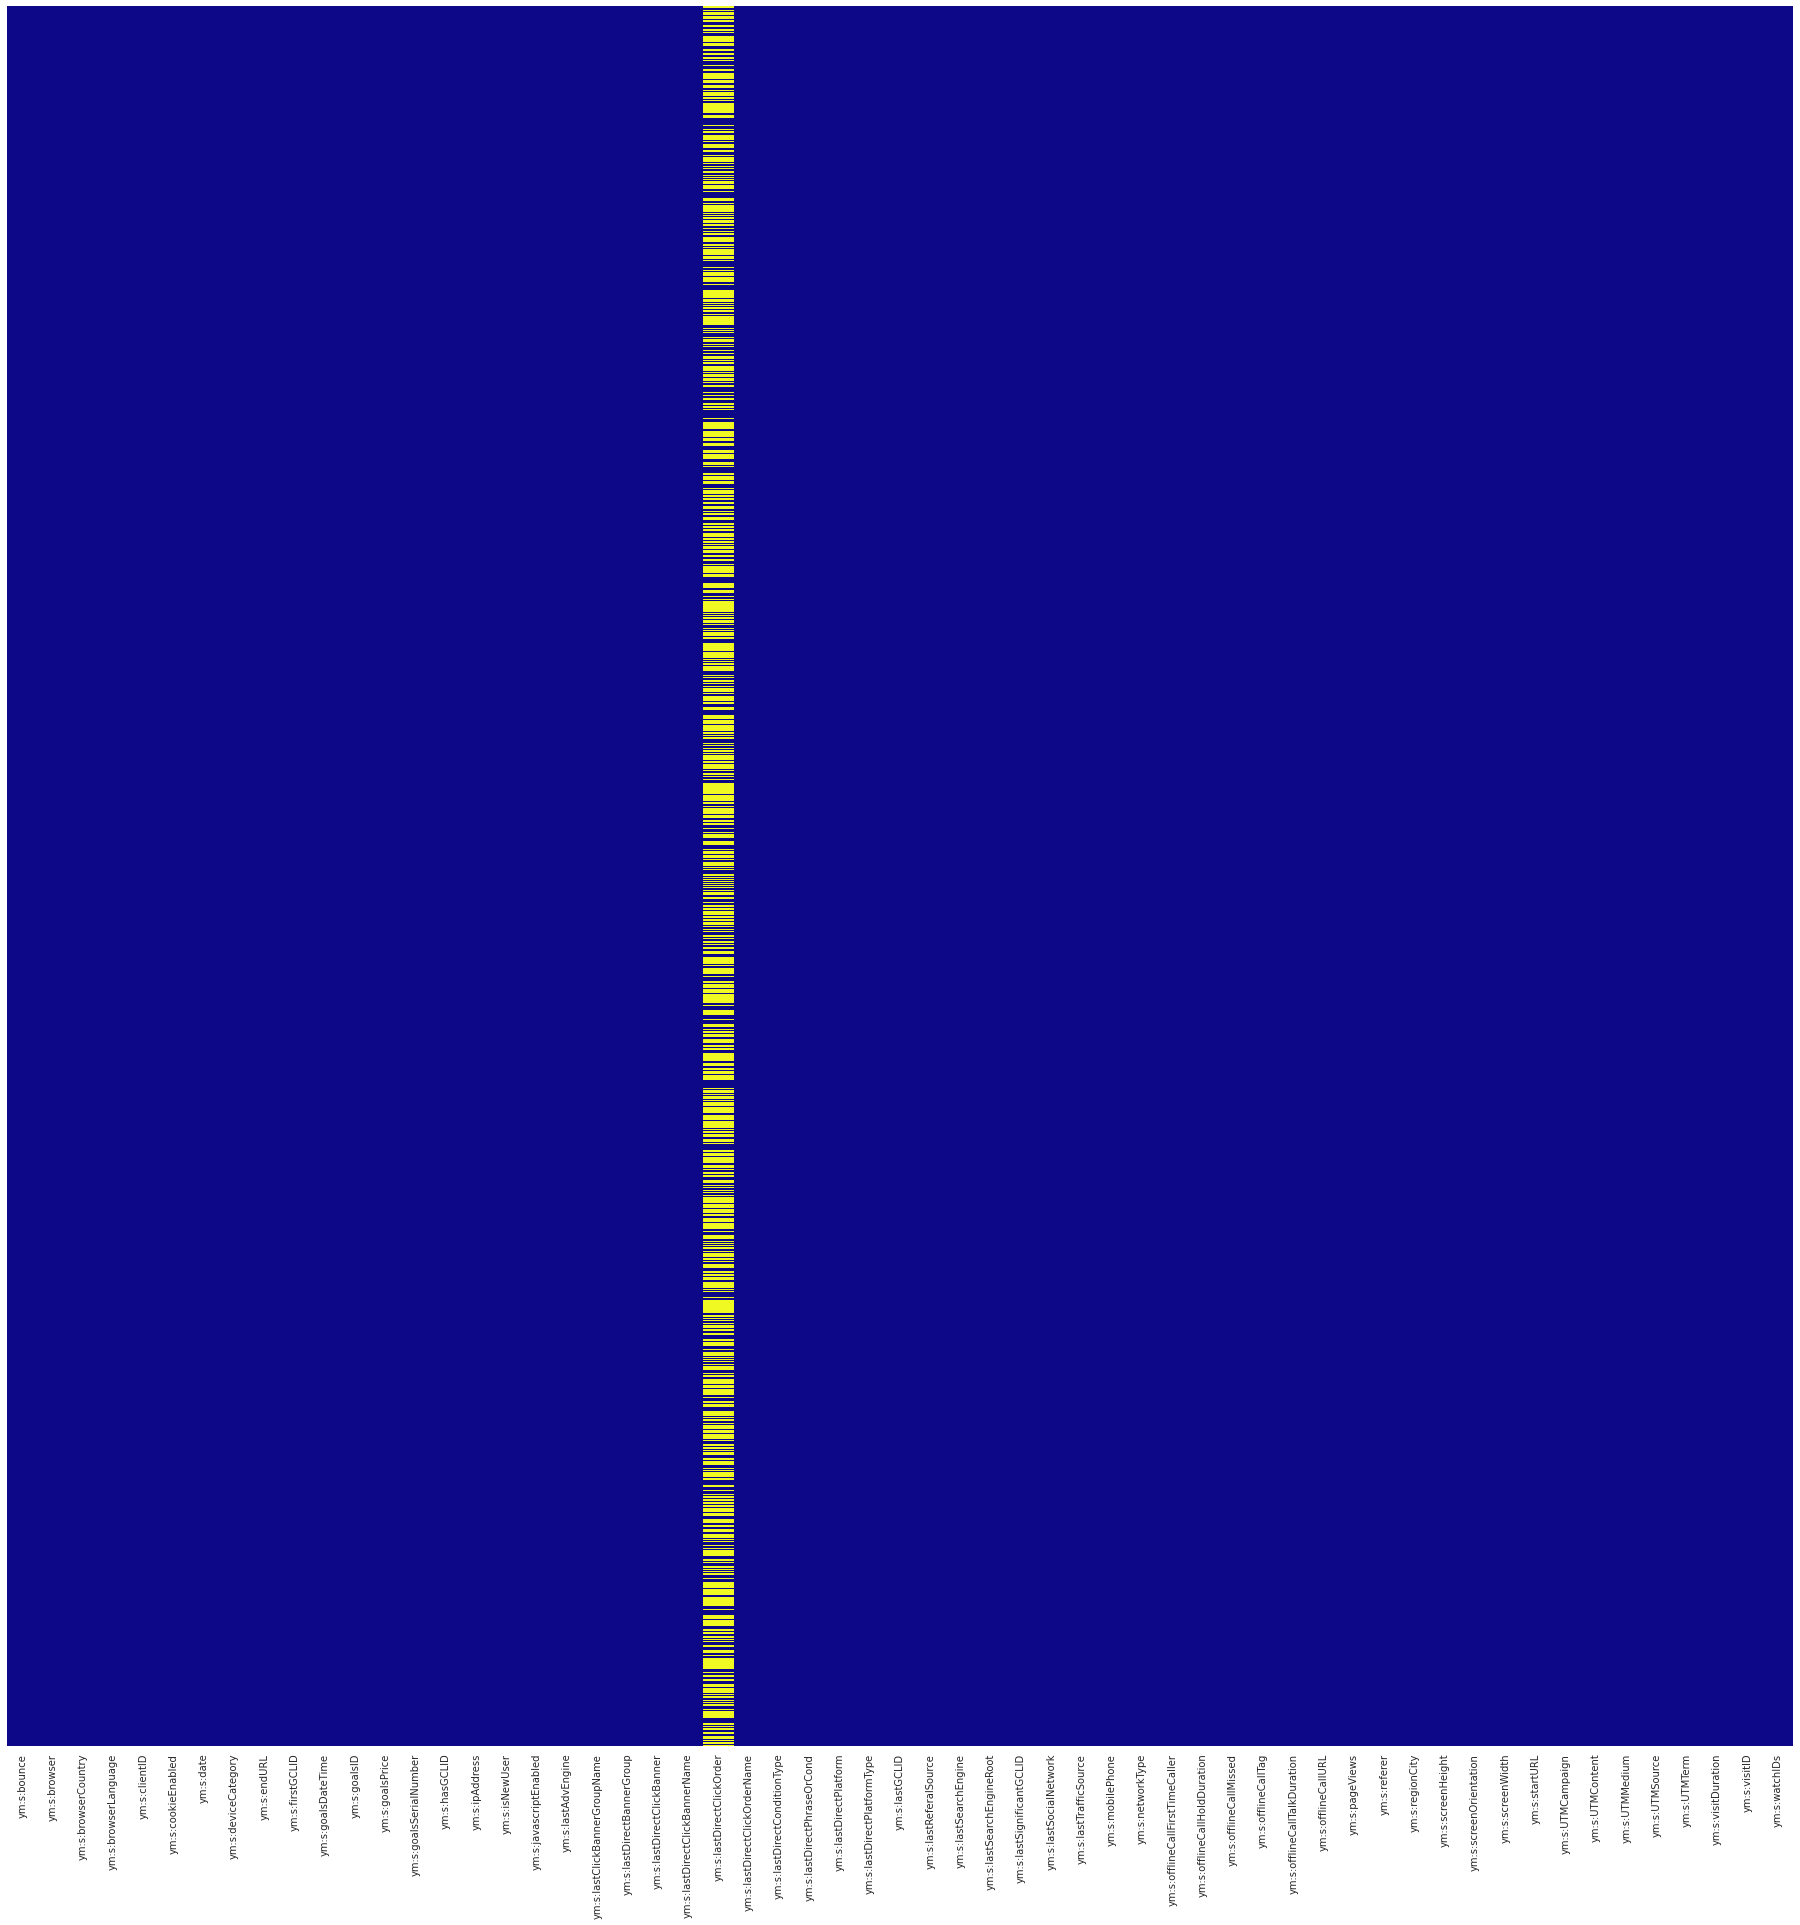

In [19]:
# Можем посмотреть на тепловую карту таблицы , где желтым цветом будут отображаться NAN, а синим - полезные данные
fig, ax = plt.subplots(figsize=(32,32))                                             # Создаем область под график
sns_heatmap = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='plasma') # Визуализируем пропуски
plt.show()  

In [20]:
#  Заменим NaN на среднее значение
df['ym:s:lastDirectClickOrder'] = df['ym:s:lastDirectClickOrder'].fillna(df['ym:s:lastDirectClickOrder'].mean())

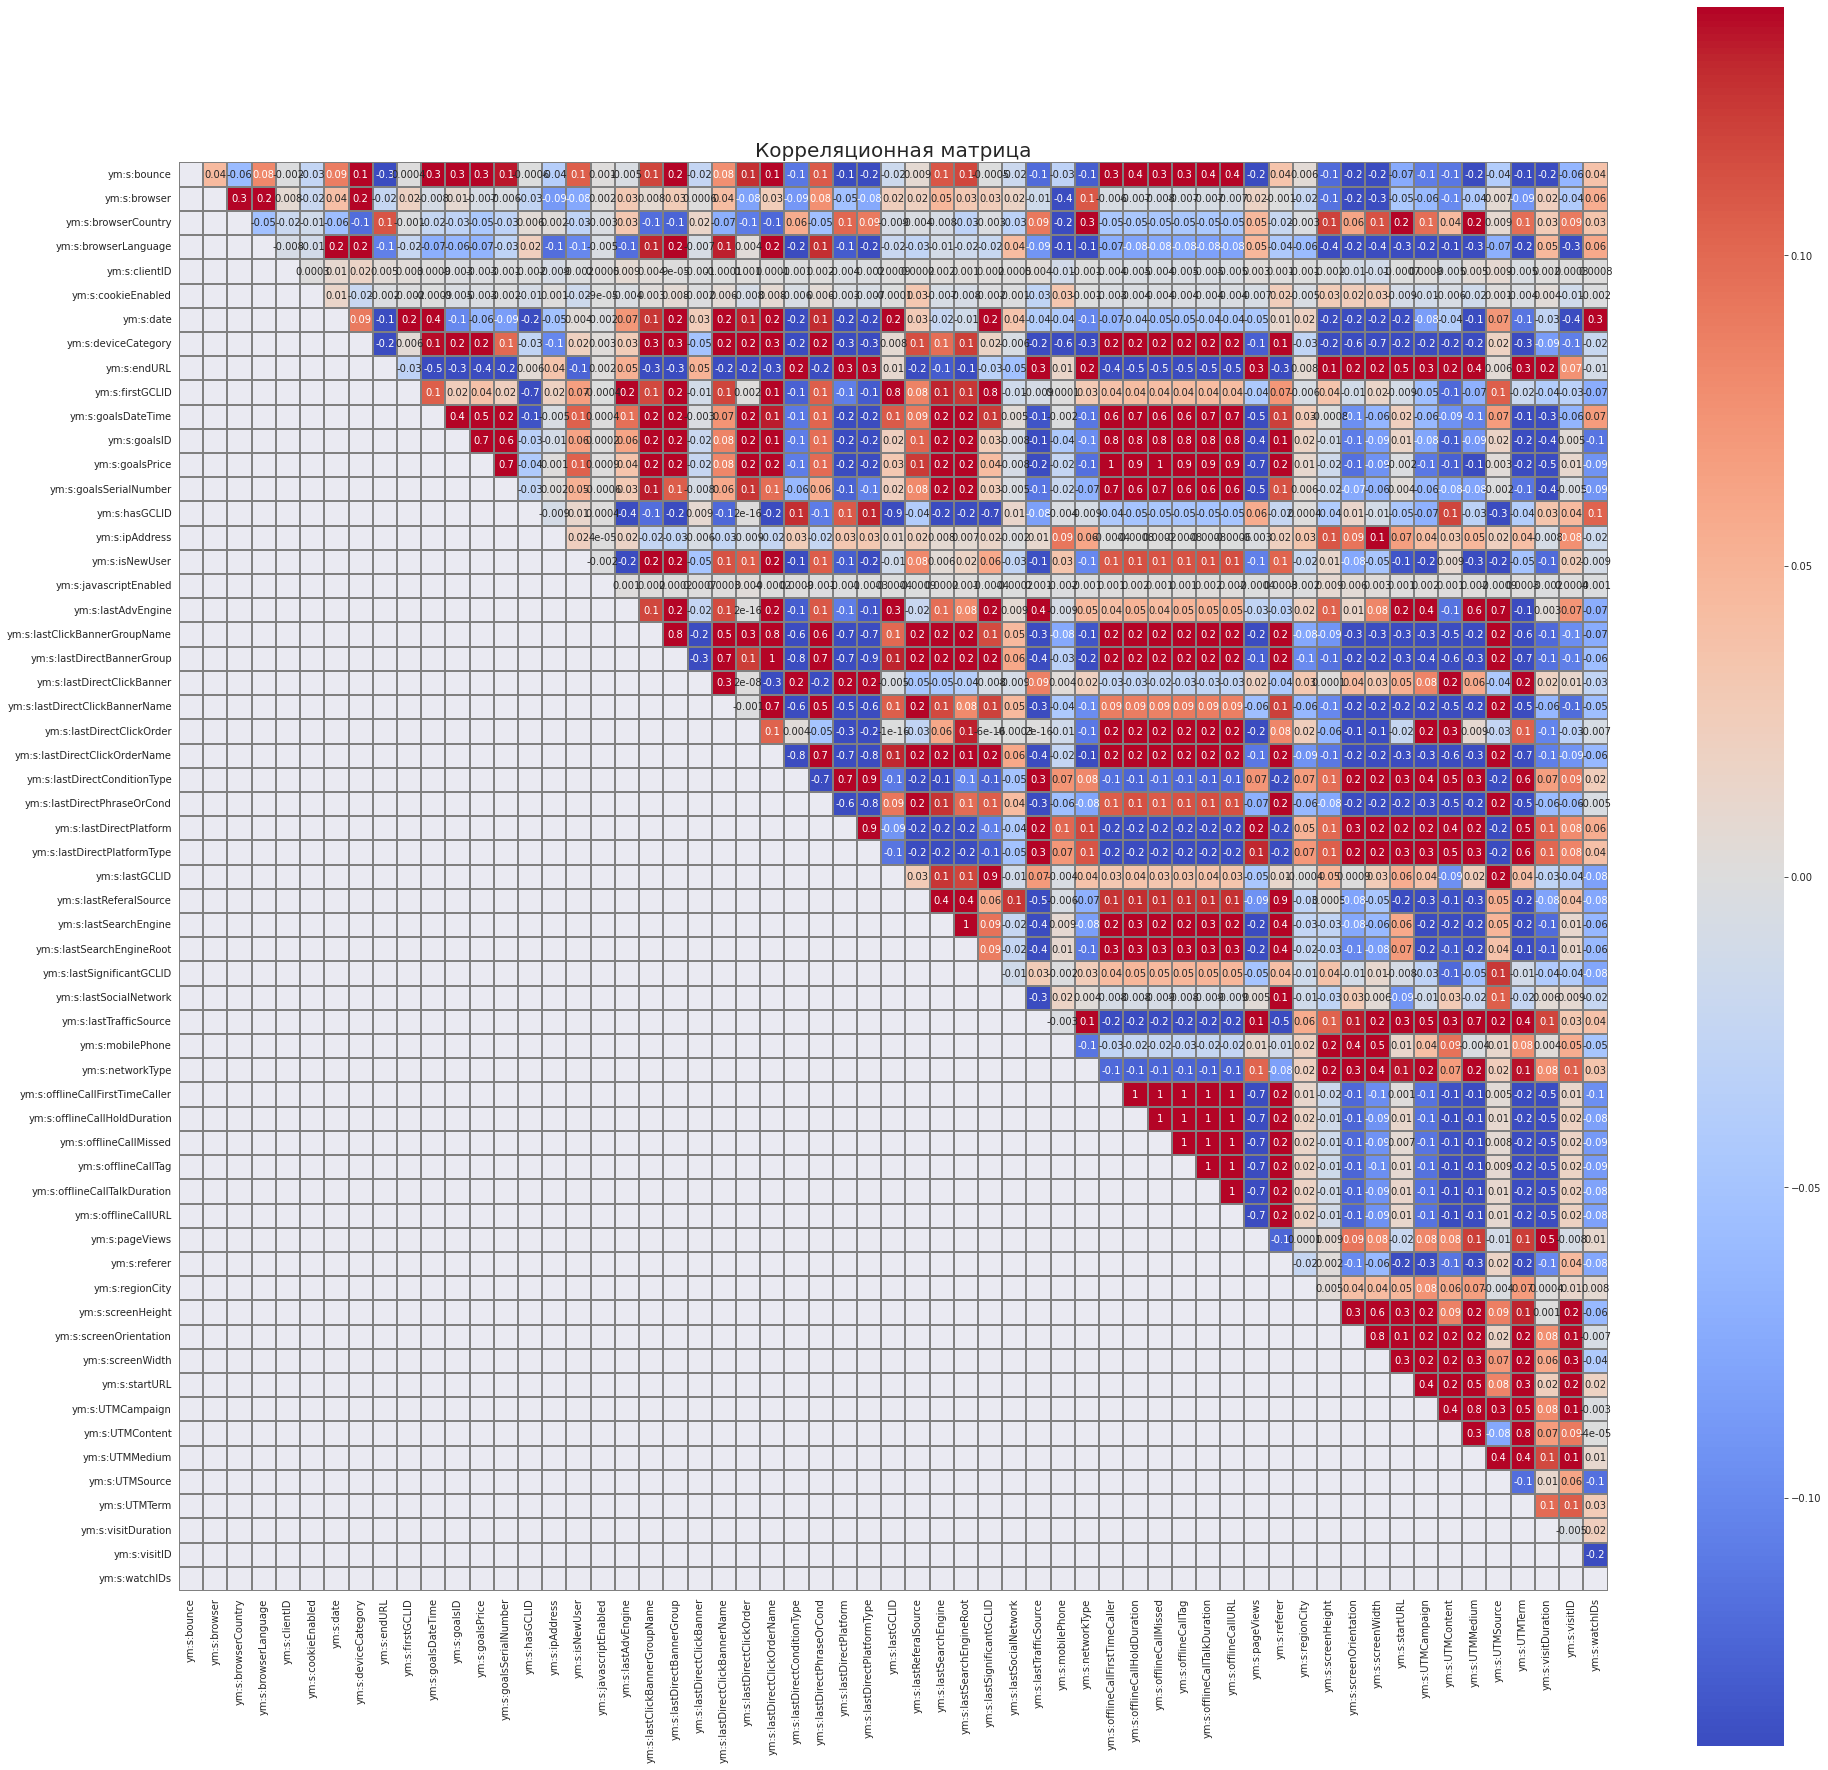

In [21]:
# Таблица корреляции признаков
mask_1 = np.tril(df.corr())
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

In [22]:
# Удалим слабо коррелирующие с целевым параметром столбцы
del df['ym:s:javascriptEnabled']
del df['ym:s:cookieEnabled']

In [23]:
# Подготовим данные, отделим целевой столбец
X = df.drop('ym:s:goalsID', axis=1)
# X = df.drop('ym:s:ipAddress', axis=1)
y = df['ym:s:goalsID']  # целевой столбец

In [24]:
# Количество NaN в каждом столбце
X.isna().sum()

ym:s:bounce                        0
ym:s:browser                       0
ym:s:browserCountry                0
ym:s:browserLanguage               0
ym:s:clientID                      0
ym:s:date                          0
ym:s:deviceCategory                0
ym:s:endURL                        0
ym:s:firstGCLID                    0
ym:s:goalsDateTime                 0
ym:s:goalsPrice                    0
ym:s:goalsSerialNumber             0
ym:s:hasGCLID                      0
ym:s:ipAddress                     0
ym:s:isNewUser                     0
ym:s:lastAdvEngine                 0
ym:s:lastClickBannerGroupName      0
ym:s:lastDirectBannerGroup         0
ym:s:lastDirectClickBanner         0
ym:s:lastDirectClickBannerName     0
ym:s:lastDirectClickOrder          0
ym:s:lastDirectClickOrderName      0
ym:s:lastDirectConditionType       0
ym:s:lastDirectPhraseOrCond        0
ym:s:lastDirectPlatform            0
ym:s:lastDirectPlatformType        0
ym:s:lastGCLID                     0
y

In [25]:
#  Чтобы сэкономить память приведем данные к типу int16
for column in X.columns:
  X[column] = X[column].astype('int16')

In [26]:
# Нормализуем данные
scaler = StandardScaler(with_mean=False)
scaler.fit(X)
X_scaled = scaler.transform(X)

In [27]:
X_scaled

array([[ 2.31749755,  0.30165044,  7.10274461, ...,  0.        ,
         0.70458411, -1.30466711],
       [ 2.31749755,  2.89584421,  5.66421405, ...,  0.        ,
         1.79668948, -0.99287316],
       [ 2.31749755,  2.17188316,  7.64219357, ...,  0.        ,
         2.42200788,  0.55696346],
       ...,
       [ 2.31749755,  0.36198053,  5.66421405, ...,  0.02288762,
         1.57650695, -0.95502076],
       [ 0.        ,  1.38759202,  5.66421405, ...,  0.04291428,
         2.5453101 , -0.04128393],
       [ 0.        ,  0.30165044,  5.66421405, ...,  0.04291428,
         2.12255963,  0.54761915]])

In [28]:
# Применим SelectKBest для извлечения лучших признаков
model = SelectKBest(score_func=f_regression, k=50)
fit = model.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Соединяем два датафрейма для лучше визуализации 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # названия столбцов нового датафрейма
print(featureScores.nlargest(50,'Score'))  # печатаем лучшие признаки

                              Specs          Score
38              ym:s:offlineCallTag  614265.757781
39     ym:s:offlineCallTalkDuration  613451.562524
36     ym:s:offlineCallHoldDuration  611203.616785
40              ym:s:offlineCallURL  586897.469318
37           ym:s:offlineCallMissed  546410.695752
35  ym:s:offlineCallFirstTimeCaller  541841.194757
10                  ym:s:goalsPrice  416468.062172
11           ym:s:goalsSerialNumber  168485.073403
41                   ym:s:pageViews   76233.213833
53               ym:s:visitDuration   59414.151915
7                       ym:s:endURL   46736.740395
0                       ym:s:bounce   26448.898503
29        ym:s:lastSearchEngineRoot   15939.226873
28            ym:s:lastSearchEngine   15832.239850
24          ym:s:lastDirectPlatform   14560.804194
16    ym:s:lastClickBannerGroupName   13901.028438
52                     ym:s:UTMTerm   12135.809008
25      ym:s:lastDirectPlatformType   10489.492173
20        ym:s:lastDirectClickO

In [29]:
# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

In [30]:
# Приводим в numpy массив
X_scaled = np.array(X_scaled)

In [31]:
print(X_scaled)
print('------------------')
print(X_scaled.shape)

[[ 2.31749755  0.30165044  7.10274461 ...  0.          0.70458411
  -1.30466711]
 [ 2.31749755  2.89584421  5.66421405 ...  0.          1.79668948
  -0.99287316]
 [ 2.31749755  2.17188316  7.64219357 ...  0.          2.42200788
   0.55696346]
 ...
 [ 2.31749755  0.36198053  5.66421405 ...  0.02288762  1.57650695
  -0.95502076]
 [ 0.          1.38759202  5.66421405 ...  0.04291428  2.5453101
  -0.04128393]
 [ 0.          0.30165044  5.66421405 ...  0.04291428  2.12255963
   0.54761915]]
------------------
(361919, 56)


In [32]:
# Создадим столбец и заполним его нулями (работаем с копией базы, в которой не было нормирования)
df_backup['target_y5'] = 0

In [33]:
# Найдем индексы тех ячеек, которые содержит целевую переменную "201589066" и по этим индексам вставим в нулевой столбец единички
y5 = df_backup[df_backup['ym:s:goalsID'].str.contains('201589066', na=False)].index 
for i in y5:
  df_backup['target_y5'][i] = 1 

<ipython-input-33-21ad67d58ab4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backup['target_y5'][i] = 1


In [34]:
df_backup['target_y5'].unique()

array([0, 1])

In [35]:
# Выделяем целевой столбец
y_target = df_backup['target_y5']

In [36]:
y_target = np.array(y_target)

In [37]:
print(y_target.shape)

(361919,)


In [38]:
# Разделим датасет на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

## #Эксперимент #1

In [43]:
model = Sequential()
# Полносвязный слой с 128 нейронами и функцией активации ReLU
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# Слой Dropout, который помогает предотвратить переобучение
model.add(Dropout(0.2))
# Полносвязный слой с 64 нейронами и функцией активации ReLU
model.add(Dense(64, activation='relu'))
# Слой BatchNormalization, который улучшает стабильность обучения
model.add(BatchNormalization())
# Полносвязный слой с 32 нейронами и функцией активации ReLU
model.add(Dense(32, activation='relu'))
# Слой Dropout, который помогает предотвратить переобучение
model.add(Dropout(0.2))
model.add(Flatten())
# Выходной слой с 1 нейроном и функцией активации sigmoid для бинарной классификации
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               7296      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [45]:
# Компиляция модели с оптимизатором Adam и метриками precision и recall
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

In [47]:
# Обучаем сеть
history = model.fit(X_train, y_train, verbose=1, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
7239/7239 [==============================] - 35s 5ms/step - loss: 0.0058 - accuracy: 0.9980 - precision: 0.7393 - recall: 0.6867 - val_loss: 0.0070 - val_accuracy: 0.9976 - val_precision: 0.6254 - val_recall: 0.9644
Epoch 2/35
7239/7239 [==============================] - 31s 4ms/step - loss: 0.0051 - accuracy: 0.9982 - precision: 0.7703 - recall: 0.7072 - val_loss: 0.0043 - val_accuracy: 0.9983 - val_precision: 0.7368 - val_recall: 0.8711
Epoch 3/35
7239/7239 [==============================] - 32s 4ms/step - loss: 0.0048 - accuracy: 0.9983 - precision: 0.7778 - recall: 0.7253 - val_loss: 0.0039 - val_accuracy: 0.9987 - val_precision: 0.8101 - val_recall: 0.8533
Epoch 4/35
7239/7239 [==============================] - 29s 4ms/step - loss: 0.0045 - accuracy: 0.9984 - precision: 0.7939 - recall: 0.7566 - val_loss: 0.0049 - val_accuracy: 0.9985 - val_precision: 0.7396 - val_recall: 0.9467
Epoch 5/35
7239/7239 [==============================] - 29s 4ms/step - loss: 0.0041 - accura

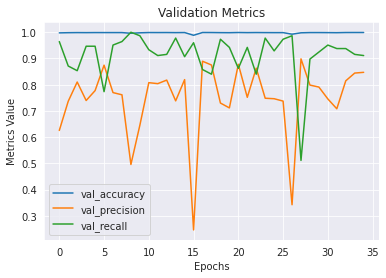

In [48]:
# Построение графиков
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_precision'], label='val_precision')
plt.plot(history.history['val_recall'], label='val_recall')

# Добавление легенды и заголовка
plt.legend()
plt.title('Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics Value')

# Отображение графика
plt.show()

In [49]:
model.evaluate(X_test, y_test, batch_size=32)

2262/2262 [==============================] - 6s 3ms/step - loss: 0.0030 - accuracy: 0.9991 - precision: 0.8287 - recall: 0.9405


[0.0029751958791166544,
 0.9991158246994019,
 0.8286713361740112,
 0.9404761791229248]

# Эксперимент #2

In [39]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.9 MB/s eta 0:00:00


In [42]:
import autokeras as ak

# Создание объекта класса StructuredDataClassifier
clf = ak.StructuredDataClassifier(max_trials=10, num_classes=1)

# Подгонка модели на тренировочных данных
clf.fit(X_train, y_train, epochs=10, batch_size=64)

# Сохранение в переменную 3 лучших моделей 
best_models = clf.tuner.get_best_models(num_models=3)

# Оценка качества модели на тестовых данных
score = clf.evaluate(X_test, y_test)
print(score)

# Получение предсказаний на тестовых данных
predictions = clf.predict(X_test)

Trial 10 Complete [00h 17m 52s]
val_accuracy: 0.9979949593544006

Best val_accuracy So Far: 0.9981159567832947
Total elapsed time: 02h 27m 36s
Epoch 1/10
4524/4524 [==============================] - 47s 10ms/step - loss: 0.0119 - accuracy: 0.9974
Epoch 2/10
4524/4524 [==============================] - 46s 10ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 3/10
4524/4524 [==============================] - 44s 10ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 4/10
4524/4524 [==============================] - 44s 10ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 5/10
4524/4524 [==============================] - 47s 10ms/step - loss: 0.0031 - accuracy: 0.9989
Epoch 6/10
4524/4524 [==============================] - 44s 10ms/step - loss: 0.0034 - accuracy: 0.9989
Epoch 7/10
4524/4524 [==============================] - 45s 10ms/step - loss: 0.0027 - accuracy: 0.9989
Epoch 8/10
4524/4524 [==============================] - 45s 10ms/step - loss: 0.0024 - accuracy: 0.9991
Epoch 9/10
4524/4524 [===

2262/2262 [==============================] - 14s 6ms/step - loss: 0.0504 - accuracy: 0.9974
[0.05043730512261391, 0.9973751306533813]
2262/2262 [==============================] - 10s 5ms/step
